<a href="https://colab.research.google.com/github/NehaBhatia103/DataScienceAssignmentsSET2/blob/main/Assignment_SLR_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data (1).csv


In [ ]:
df = pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

#Data Visualization

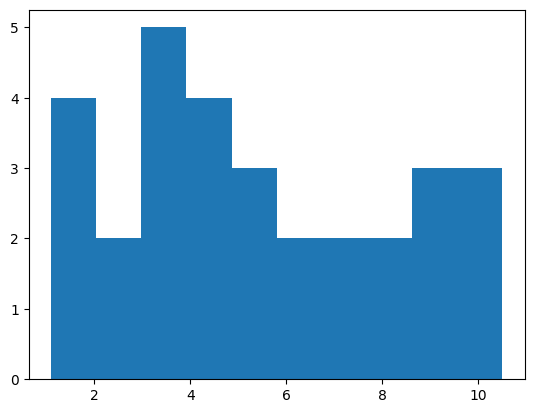

In [ ]:
plt.hist(df['YearsExperience']);

<ipython-input-34-ba3cddf2cf0d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['YearsExperience']);


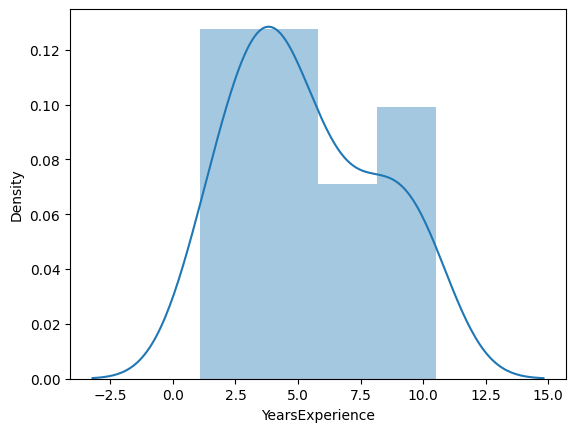

In [ ]:
sns.distplot(df['YearsExperience']);

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

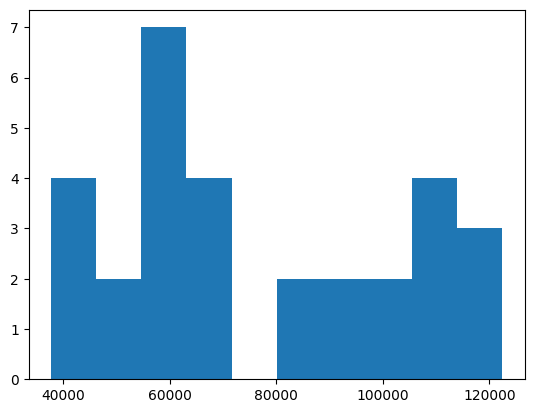

In [ ]:
plt.hist(df['Salary'])

<ipython-input-36-bc20e5e6d548>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

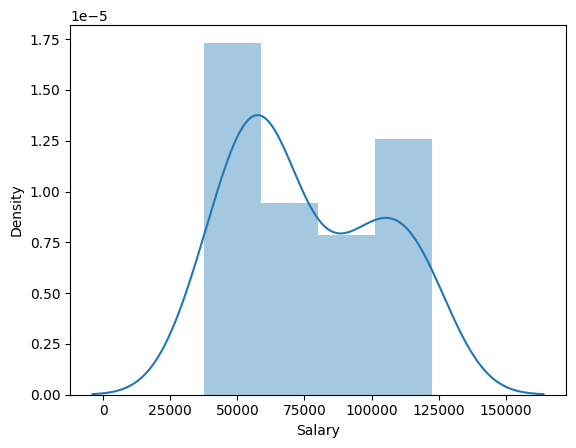

In [ ]:
sns.distplot(df['Salary'])

from the above pllots we can see that the Years of experience is normally distributed and salary is not normally distributed.

In [ ]:
corr=df.corr()
corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

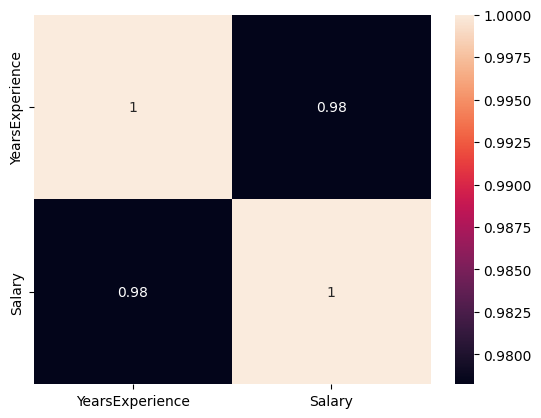

In [ ]:
sns.heatmap(corr,annot=True)

the heatmap shows there is positive relation between yearsExperience and Salary.

##Pre Processing

Normalization

In [ ]:
#from sklearn.preprocessing import Normalize
from sklearn import preprocessing
df['YearsExperience'] = preprocessing.normalize(df[['YearsExperience']], axis=0)
df['Salary'] = preprocessing.normalize(df[['Salary']], axis=0)
df.head()

,YearsExperience,Salary
0,0.033464,0.089074
1,0.039549,0.104610
2,0.045633,0.085424
3,0.060844,0.098542
4,0.066928,0.090315


In [ ]:
x = df.iloc[:, 1:2]
y = df.iloc[:, 0:1]

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

In [ ]:
model.coef_  # cofficient for prediction

array([[1.36071076]])

In [ ]:
model.intercept_  # checking for intercept

array([-0.07250049])

In [ ]:
y_pred=model.predict(x)
y_pred

array([[0.04870361],
       [0.06984339],
       [0.04373751],
       [0.0615871 ],
       [0.05039183],
       [0.10199668],
       [0.11280379],
       [0.09522838],
       [0.12603541],
       [0.10368183],
       [0.12225539],
       [0.09938425],
       [0.10296711],
       [0.10334911],
       [0.11576435],
       [0.1367963 ],
       [0.13091524],
       [0.18346895],
       [0.17815474],
       [0.21690074],
       [0.21011703],
       [0.23024942],
       [0.23958087],
       [0.27812047],
       [0.26462391],
       [0.25276628],
       [0.28784624],
       [0.27449448],
       [0.30454981],
       [0.30295093]])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error(MSE): %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination(r2): %.3f" % r2_score(y, y_pred))

Mean squared error(MSE): 0.00
Coefficient of determination: 0.957
